# Exploratory Data Analysis and Data Cleaning

In [2]:
#Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

#Setting default options for the whole notebook
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 5000)
pd.set_option('mode.chained_assignment', None)

In [3]:
#Creating a df from JSON format data 
df_elec = pd.read_json('amazon_electronics.ldjson', lines=True)

### Exploring the basic details about the df

In [4]:
#Reviewing the first 5 rows of the data
df_elec.head()

,uniq_id,crawl_timestamp,asin,product_url,product_name,image_urls__small,medium,large,browsenode,seller_name,seller_id,brand,sales_price,discount_percentage,weight,rating,sales_rank_in_parent_category,delivery_type,meta_keywords,amazon_prime__y_or_n,parent___child_category__all,best_seller_tag__y_or_n,other_items_customers_buy,technical_details__k_v_pairs,colour,no__of_reviews,no__of_offers,no__of_sellers,sales_rank_in_child_category,product_details__k_v_pairs,Number_Of_Items,Batteries_Included,Batteries_Required,Material,Form_Factor,left_in_stock
0,8258a459bf720ac86b8bc2d214346c35,2020-02-06 19:30:06 +0000,B07652FT69,https://www.amazon.in/Cazcase-Pattern-Smart-Co...,Cazcase Deer Pattern Smart Case Cover Flip Sta...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1375329031,E Shop Solution,A3BZXLJLCY3NHJ,CAZCASE,699.0,46%,308 g,3.8,{'ComputersAccessories': 'Amazon Bestsellers R...,fulfilled_by_amazon,Cazcase Deer Pattern Smart Case Cover Flip Sta...,Y,{'ComputersAccessories': 'Amazon Bestsellers R...,N,ProElite Smart Deer Flip case Cover for Apple ...,"{'Brand': 'CAZCASE', 'Colour': 'browm', 'Item_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8610899e786315b1adad872764f424b0,2020-02-07 00:20:04 +0000,B07TMCY7WN,https://www.amazon.in/D-kandy-Gionee-A1-Lite-M...,"D-kandy for Gionee A1 Lite, Fashion Series Lea...",https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN,1389409031,SHIV DURGA ENTERPRISES,A2SD7UGM4EQIRK,D-kandy,699.0,46%,81.6 g,4.6,NaN,fulfilled_by_merchant,"D-kandy for Gionee A1 Lite, Fashion Series Lea...",Y,NaN,N,NaN,"{'Brand': 'D-kandy', 'Model': 'Gionee A1 Lite'...",Blue|Cloth BLUE|Cloth Grey|Customised Black|Fa...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1b0e4aa1d0cd635e2366558512ccc067,2020-02-06 19:59:39 +0000,B079VL519L,https://www.amazon.in/Heartly-Lenovo-A6600-Spi...,Heartly Kickstand Hard Dual Rugged Armor Hybri...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1389409031,Ruh International,A1TOV1MNM33TCG,Heartly,299.0,77%,49.9 g,4.6,"{'Electronics': 'Amazon Bestsellers Rank #6,98...",fulfilled_by_amazon,Heartly Kickstand Hard Dual Rugged Armor Hybri...,Y,"{'Electronics': 'Amazon Bestsellers Rank #6,98...",N,NaN,"{'Brand': 'Heartly', 'Model': 'For Lenovo A660...",Best Black|Power Blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,c5499856b11d3a2796bdd362b1701fc1,2020-02-07 02:38:59 +0000,B00JYKGFWY,https://www.amazon.in/iPhone-LUVVITT%C2%AE-Scr...,"iPhone 6 Case, LUVVITT® ULTRA ARMOR iPhone 6 C...",https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1389409031,HelloYehlo,A1JBMJTTJQ09FC,Luvvitt,3954.0,34%,68 g,4.6,"{'Electronics': 'Amazon Bestsellers Rank #31,8...",fulfilled_by_merchant,"iPhone 6 Case, LUVVITT® ULTRA ARMOR iPhone 6 C...",N,"{'Electronics': 'Amazon Bestsellers Rank #31,8...",N,Mr Shield [3-Pack]-Mr Shield for iPhone 6/iPho...,"{'Item_Weight': '68 g', 'Product_Dimensions': ...",NaN,7536.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ce5ac9f85505667fb9dafce9c1b0103c,2020-02-07 13:30:48 +0000,B07LB5SGK7,https://www.amazon.in/Redgear-MPR800-Soft-Mous...,Redgear MPR800 Soft Base Mousepad with 4 LED S...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1375413031,Appario Retail Private Ltd,A14CZOWI0VEHLG,Redgear,1499.0,35%,—,4.6,{'ComputersAccessories': 'Amazon Bestsellers R...,fulfilled_by_amazon,Redgear MPR800 Soft Base Mousepad with 4 LED S...,Y,{'ComputersAccessories': 'Amazon Bestsellers R...,N,"AmazonBasics Extended Gaming Mouse Pad,Black |...","{'Brand': 'Redgear', 'Item_Weight': '730 g', '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [5]:
#Checking the total number of rows and columns
df_elec.shape

(10000, 36)

In [6]:
#Reviewing the last 5 rows of the data
df_elec.tail()

,uniq_id,crawl_timestamp,asin,product_url,product_name,image_urls__small,medium,large,browsenode,seller_name,seller_id,brand,sales_price,discount_percentage,weight,rating,sales_rank_in_parent_category,delivery_type,meta_keywords,amazon_prime__y_or_n,parent___child_category__all,best_seller_tag__y_or_n,other_items_customers_buy,technical_details__k_v_pairs,colour,no__of_reviews,no__of_offers,no__of_sellers,sales_rank_in_child_category,product_details__k_v_pairs,Number_Of_Items,Batteries_Included,Batteries_Required,Material,Form_Factor,left_in_stock
9995,d91a55f03a0d149fc53abbe0576652ed,2020-02-07 00:03:45 +0000,B01HHNGYOI,https://www.amazon.in/Incipio-Octane-Moto-g4-P...,Incipio Octane for Moto g4/ g4 Plus - Frost/Cyan,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1389409031,NaN,NaN,Incipio,NaN,NaN,49.9 g,4.5,NaN,fulfilled_by_merchant,Incipio Octane for Moto g4/ g4 Plus - Frost/Cy...,N,NaN,N,[2-Pack] Motorola Moto G4 / Moto G (4th Genera...,"{'Item_Weight': '49.9 g', 'Product_Dimensions'...",Frost/Black|Frost/Cyan,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,211c9b201b2a282179f9eaab067b4702,2020-02-07 07:07:04 +0000,B0054EPPZM,https://www.amazon.in/Fotodiox-Extension-Extre...,Fotodiox Macro Extension Tube Set for Extreme ...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,NaN,1389089031,FastMedia Ship from USA,A3AOLEOYOOLX74,Fotodiox,1658.0,43%,100 grams,5.0,"{'Electronics': 'Amazon Bestsellers Rank #9,23...",fulfilled_by_merchant,Fotodiox Macro Extension Tube Set for Extreme ...,N,"{'Electronics': 'Amazon Bestsellers Rank #9,23...",N,Andoer Metal Electronic TTL Auto Focus AF Macr...,"{'Brand': 'Fotodiox', 'Model': '10-MCR-MFT-Kit...",NaN,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,4805b0e77be4bab79a2a7a051f5a62a0,2020-02-06 23:30:55 +0000,B07RD6BJSK,https://www.amazon.in/BuyFeb-Printed-Xiaomi-Re...,BuyFeb Soft Printed Back Cover Case for Xiaomi...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1389409031,BuyFeb com,AX46U84U4OUU8,BuyFeb,239.0,76%,31.8 g,3.5,"{'Electronics': 'Amazon Bestsellers Rank #7,39...",fulfilled_by_merchant,BuyFeb Soft Printed Back Cover Case for Xiaomi...,Y,"{'Electronics': 'Amazon Bestsellers Rank #7,39...",N,Fashionury Pink Leaves Designer Printed 360 De...,"{'Brand': 'BuyFeb', 'Model': 'Xiaomi Redmi Y3'...",Design1|Design10|Design11|Design12|Design13|De...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,8700c595ec10693de142bae85108eb04,2020-02-07 02:22:53 +0000,B07KMVTGTV,https://www.amazon.in/Luxendary-Designer-Print...,"Luxendary Designer, 3D Printed, Fashion, High ...",https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,1389409031,NaN,NaN,Luxendary,7222.0,NaN,118 g,3.0,NaN,fulfilled_by_merchant,"Luxendary Designer, 3D Printed, Fashion, High ...",N,NaN,N,NaN,"{'Item_Weight': '118 g', 'Product_Dimensions':...",NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9999,ebf6823b1266c938d14caee8711b27de,2020-02-06 23:11:40 +0000,B006OLFW16,https://www.amazon.in/Creative-HS-150-HS-150-H...,Creative HS 150 Headphone,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,https://images-na.ssl-images-amazon.com/images...,14146391031,NaN,NaN,Creative,1199.0,NaN,87 grams,3.6,{'ComputersAccessories': 'Amazon Bestsellers R...,fulfilled_by_merchant,"Creative HS 150 Headphone,Creatie,HS-150,Creat...",N,{'ComputersAccessories': 'Amazon Bestsellers R...,N,Creative Sound Blaster Jam Ultra-Light Bluetoo...,"{'Brand': 'Creative', 'Item_Weight': '86.2 g',...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Viewing all columns in the df
df_elec.columns

Index(['uniq_id', 'crawl_timestamp', 'asin', 'product_url', 'product_name', 'image_urls__small', 'medium', 'large', 'browsenode', 'seller_name', 'seller_id', 'brand', 'sales_price', 'discount_percentage', 'weight', 'rating', 'sales_rank_in_parent_category', 'delivery_type', 'meta_keywords', 'amazon_prime__y_or_n', 'parent___child_category__all', 'best_seller_tag__y_or_n', 'other_items_customers_buy', 'technical_details__k_v_pairs', 'colour', 'no__of_reviews', 'no__of_offers', 'no__of_sellers', 'sales_rank_in_child_category', 'product_details__k_v_pairs', 'Number_Of_Items', 'Batteries_Included', 'Batteries_Required', 'Material', 'Form_Factor', 'left_in_stock'], dtype='object')

### Find, replace and remove **NULL** values and drop useless columns

In [8]:
#Split the crawl-timestamp column to check if it's worth keeping
df_elec[['date', 'time']] = df_elec['crawl_timestamp'].str.split(' ', n=1, expand=True)
df_elec.drop('time', axis=1)
df_elec['date'].value_counts()

#Only 2 unique dates so it's useless

date
2020-02-07    6006
2020-02-06    3994
Name: count, dtype: int64

In [9]:
#The number of null values in each column
df_elec.isnull().sum()

uniq_id                             0
crawl_timestamp                     0
asin                                0
product_url                         0
product_name                        0
image_urls__small                   0
medium                              0
large                            1546
browsenode                          0
seller_name                      1691
seller_id                        1692
brand                              33
sales_price                       437
discount_percentage              2051
weight                              0
rating                              0
sales_rank_in_parent_category    3099
delivery_type                       0
meta_keywords                       0
amazon_prime__y_or_n                0
parent___child_category__all     3099
best_seller_tag__y_or_n             0
other_items_customers_buy        4462
technical_details__k_v_pairs      349
colour                           5956
no__of_reviews                   7473
no__of_offer

In [10]:
#Removing useless columns
df_elec = df_elec.drop(['uniq_id', 'crawl_timestamp','product_url', 'image_urls__small',
              'medium', 'large', 'browsenode', 'seller_id', 'parent___child_category__all', 'other_items_customers_buy', 'technical_details__k_v_pairs'
              ,'colour', 'no__of_reviews', 'no__of_offers', 'no__of_sellers', 'sales_rank_in_child_category'
              , 'product_details__k_v_pairs', 'Number_Of_Items', 'Batteries_Included', 'Batteries_Required'
              , 'Material', 'Form_Factor', 'left_in_stock', 'date', 'time'], axis=1)

In [11]:
df_elec.isnull().sum()

asin                                0
product_name                        0
seller_name                      1691
brand                              33
sales_price                       437
discount_percentage              2051
weight                              0
rating                              0
sales_rank_in_parent_category    3099
delivery_type                       0
meta_keywords                       0
amazon_prime__y_or_n                0
best_seller_tag__y_or_n             0
dtype: int64

In [12]:
#Removing the rows which contain null values in the sales rank category
df_elec.dropna(axis=0, subset=['sales_rank_in_parent_category'], inplace=True)

In [13]:
df_elec.isnull().sum()

asin                               0
product_name                       0
seller_name                      601
brand                              4
sales_price                      144
discount_percentage              900
weight                             0
rating                             0
sales_rank_in_parent_category      0
delivery_type                      0
meta_keywords                      0
amazon_prime__y_or_n               0
best_seller_tag__y_or_n            0
dtype: int64

In [14]:
#When the sales_price is missing, the seller and discount % are missing too
df_elec[['seller_name', 'sales_price','discount_percentage']].isnull().all(1).sum()

144

In [15]:
#All rows that have missing prices have dropship as delivery type
no_price = df_elec[df_elec['sales_price'].isnull()]
no_price['delivery_type'].value_counts()

delivery_type
fulfilled_by_merchant    144
Name: count, dtype: int64

In [16]:
#Dropping the rows where we're missing a seller and a price
df_elec.dropna(axis=0, subset=['seller_name', 'sales_price'], inplace=True)

In [17]:
df_elec.isnull().sum()

asin                               0
product_name                       0
seller_name                        0
brand                              2
sales_price                        0
discount_percentage              299
weight                             0
rating                             0
sales_rank_in_parent_category      0
delivery_type                      0
meta_keywords                      0
amazon_prime__y_or_n               0
best_seller_tag__y_or_n            0
dtype: int64

In [18]:
#Replacing the null values with 0
df_elec['discount_percentage'].fillna('0', inplace=True)

In [19]:
#Useless 2 rows because we don't have a brand
df_elec[df_elec['brand'].isnull()]

,asin,product_name,seller_name,brand,sales_price,discount_percentage,weight,rating,sales_rank_in_parent_category,delivery_type,meta_keywords,amazon_prime__y_or_n,best_seller_tag__y_or_n
971,B01LQAA48A,ShopReals 2 Amp Charger For Samsung Galaxy Tab...,ShopsGeniune,NaN,349.0,0,999999999,5.0,{'ComputersAccessories': 'Amazon Bestsellers R...,fulfilled_by_merchant,ShopReals 2 Amp Charger For Samsung Galaxy Tab...,Y,N
7414,B07CCKXM3H,[1 Pack] Microsoft Surface Book 2 Screen Prote...,Cart2India SLP,NaN,2709.0,40%,386 g,3.7,"{'Electronics': 'Amazon Bestsellers Rank #14,1...",fulfilled_by_merchant,[1 Pack] Microsoft Surface Book 2 Screen Prote...,N,N


In [20]:
#Removing the rows by using their indexes
df_elec.drop([971,7414], axis=0, inplace=True)

In [21]:
df_elec.isnull().sum()

asin                             0
product_name                     0
seller_name                      0
brand                            0
sales_price                      0
discount_percentage              0
weight                           0
rating                           0
sales_rank_in_parent_category    0
delivery_type                    0
meta_keywords                    0
amazon_prime__y_or_n             0
best_seller_tag__y_or_n          0
dtype: int64

In [22]:
df_elec.shape

(6298, 13)

#### Extract the Rank and Convert it to a numerical value

In [23]:
#Initialize an empty list to store the rank values
rank = []

#Extract the values contaning the rank from the dict
for key, val in df_elec['sales_rank_in_parent_category'].items():
    for k, v in val.items():
        rank.append(v)
        
df_elec['rank'] = rank
#Use regex to extract only the number separated by commas
df_elec['rank'] = df_elec['rank'].str.extract(r'#([\d,]+)')
#Convert to int format
df_elec['rank'] = df_elec['rank'].str.replace(',', '', regex=True).astype('int64')

In [24]:
df_elec.drop(columns='sales_rank_in_parent_category', inplace=True)

In [25]:
df_elec.head()

,asin,product_name,seller_name,brand,sales_price,discount_percentage,weight,rating,delivery_type,meta_keywords,amazon_prime__y_or_n,best_seller_tag__y_or_n,rank
0,B07652FT69,Cazcase Deer Pattern Smart Case Cover Flip Sta...,E Shop Solution,CAZCASE,699.0,46%,308 g,3.8,fulfilled_by_amazon,Cazcase Deer Pattern Smart Case Cover Flip Sta...,Y,N,35464
2,B079VL519L,Heartly Kickstand Hard Dual Rugged Armor Hybri...,Ruh International,Heartly,299.0,77%,49.9 g,4.6,fulfilled_by_amazon,Heartly Kickstand Hard Dual Rugged Armor Hybri...,Y,N,698934
3,B00JYKGFWY,"iPhone 6 Case, LUVVITT® ULTRA ARMOR iPhone 6 C...",HelloYehlo,Luvvitt,3954.0,34%,68 g,4.6,fulfilled_by_merchant,"iPhone 6 Case, LUVVITT® ULTRA ARMOR iPhone 6 C...",N,N,3181968
4,B07LB5SGK7,Redgear MPR800 Soft Base Mousepad with 4 LED S...,Appario Retail Private Ltd,Redgear,1499.0,35%,—,4.6,fulfilled_by_amazon,Redgear MPR800 Soft Base Mousepad with 4 LED S...,Y,N,1679
9,B00LPC3O3M,"Verbatim Bravo Wired Notebook Optical Mouse, B...",G. G.,Verbatim,1292.0,52%,90.7 g,4.2,fulfilled_by_merchant,"Verbatim Bravo Wired Notebook Optical Mouse, B...",N,N,156041


In [26]:
df_elec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6298 entries, 0 to 9997
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   asin                     6298 non-null   object 
 1   product_name             6298 non-null   object 
 2   seller_name              6298 non-null   object 
 3   brand                    6298 non-null   object 
 4   sales_price              6298 non-null   float64
 5   discount_percentage      6298 non-null   object 
 6   weight                   6298 non-null   object 
 7   rating                   6298 non-null   float64
 8   delivery_type            6298 non-null   object 
 9   meta_keywords            6298 non-null   object 
 10  amazon_prime__y_or_n     6298 non-null   object 
 11  best_seller_tag__y_or_n  6298 non-null   object 
 12  rank                     6298 non-null   int64  
dtypes: float64(2), int64(1), object(10)
memory usage: 688.8+ KB


#### Converting all weight values to grams in a numeric format

In [27]:
'''Defining a function for extracting the weight number
    and converting it to grams, if needed'''
def weight_normalize(weight):
    if 'k' in weight.lower():
        norm_weight = weight.split(' ')[0]
        norm_weight = float(norm_weight) * 1000
        return norm_weight
    elif 'g' in weight.lower():
        norm_weight = weight.split(' ')[0]
        return norm_weight
    else:
        weight = 'Error'
    

In [28]:
#dropping the 999999999 and - values
df_elec = df_elec.loc[(df_elec['weight'] != '—') & (df_elec['weight'] != '999999999')]

In [29]:
#applying the function to all values in the weight column
df_elec['weight'] = df_elec['weight'].map(lambda x: weight_normalize(x))

In [30]:
#Converting the weight to numeric format
df_elec['weight'] = pd.to_numeric(df_elec['weight'])

In [31]:
#Indicating that the weight is in grams by renaming the column
df_elec.rename(columns={'weight': 'weight_grams'}, inplace=True)

In [32]:
#Removing the % sign from the discount values
df_elec['discount_percentage'] = df_elec['discount_percentage'].apply(lambda x: x.split('%')[0])
df_elec['discount_percentage'] = pd.to_numeric(df_elec['discount_percentage'])

In [33]:
#Converting the price from rupees to dollars
df_elec['sales_price'] = df_elec['sales_price'].apply(lambda x: round(x*0.012, 2))

In [34]:
#Number of unique values for the prime column
df_elec['amazon_prime__y_or_n'].value_counts()

amazon_prime__y_or_n
Y    4097
N    1079
Name: count, dtype: int64

In [35]:
#Number of unique values for the best seller column
df_elec['best_seller_tag__y_or_n'].value_counts()

best_seller_tag__y_or_n
N    5175
Y       1
Name: count, dtype: int64

**Because there's only 1 Best Seller value, we conclude that there's no reason \
for keeping the best seller column, as it won't be useful for the analysis**

In [36]:
df_elec.drop(columns='best_seller_tag__y_or_n', inplace=True)

In [37]:
df_elec.head()

,asin,product_name,seller_name,brand,sales_price,discount_percentage,weight_grams,rating,delivery_type,meta_keywords,amazon_prime__y_or_n,rank
0,B07652FT69,Cazcase Deer Pattern Smart Case Cover Flip Sta...,E Shop Solution,CAZCASE,8.39,46,308.0,3.8,fulfilled_by_amazon,Cazcase Deer Pattern Smart Case Cover Flip Sta...,Y,35464
2,B079VL519L,Heartly Kickstand Hard Dual Rugged Armor Hybri...,Ruh International,Heartly,3.59,77,49.9,4.6,fulfilled_by_amazon,Heartly Kickstand Hard Dual Rugged Armor Hybri...,Y,698934
3,B00JYKGFWY,"iPhone 6 Case, LUVVITT® ULTRA ARMOR iPhone 6 C...",HelloYehlo,Luvvitt,47.45,34,68.0,4.6,fulfilled_by_merchant,"iPhone 6 Case, LUVVITT® ULTRA ARMOR iPhone 6 C...",N,3181968
9,B00LPC3O3M,"Verbatim Bravo Wired Notebook Optical Mouse, B...",G. G.,Verbatim,15.50,52,90.7,4.2,fulfilled_by_merchant,"Verbatim Bravo Wired Notebook Optical Mouse, B...",N,156041
10,B07BV5K9TV,Aarfa Slimfit Durable Printed Hard Case for Xi...,arretail,Aarfa,3.58,70,49.9,3.9,fulfilled_by_merchant,Aarfa Slimfit Durable Printed Hard Case for Xi...,Y,373349


### Detecting outliers

In [38]:
#no outliers for the discount %
df_elec.loc[(df_elec['discount_percentage'] > 100) | df_elec['discount_percentage'] < 0]

,asin,product_name,seller_name,brand,sales_price,discount_percentage,weight_grams,rating,delivery_type,meta_keywords,amazon_prime__y_or_n,rank


In [39]:
#No outliers in the prime column
np.unique(df_elec['amazon_prime__y_or_n'].values)

array(['N', 'Y'], dtype=object)

In [40]:
#No outliers in the delivery column
np.unique(df_elec['delivery_type'].values)

array(['fulfilled_by_amazon', 'fulfilled_by_merchant'], dtype=object)

In [41]:
#no rating outliers
df_elec.loc[(df_elec['rating'] < 0) | df_elec['rating'] > 5]

,asin,product_name,seller_name,brand,sales_price,discount_percentage,weight_grams,rating,delivery_type,meta_keywords,amazon_prime__y_or_n,rank


In [42]:
df_elec['sales_price'].describe()

count    5176.000000
mean        9.709276
std        15.806082
min         0.470000
25%         2.990000
50%         4.670000
75%         8.390000
max       186.960000
Name: sales_price, dtype: float64

**The maximum value of the sales price column is much higher than the mean and the 75% quartile(Q3), \
so we'll plot the sales price to see its distribution**

Text(0.5, 0, 'Sales price')

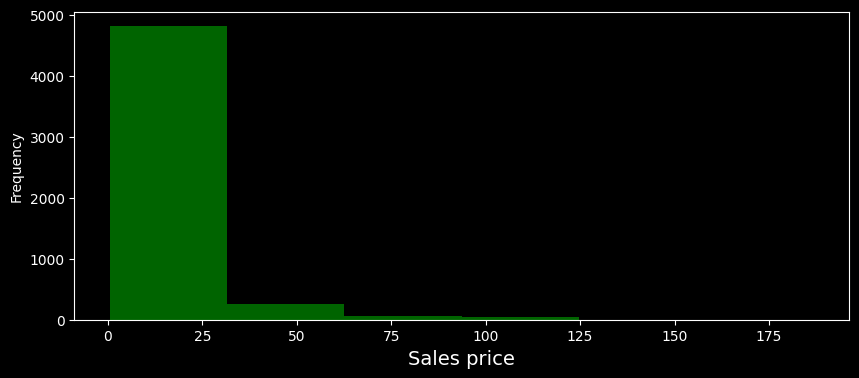

In [43]:
#Plotting the distribution of the sales price using a histogram
plt.style.use('dark_background')
df_elec['sales_price'].plot.hist(bins=6, figsize=(10,4), color='darkgreen')
plt.xlabel('Sales price', fontsize=14)

Text(0.5, 1.0, 'Sales Price Distribution')

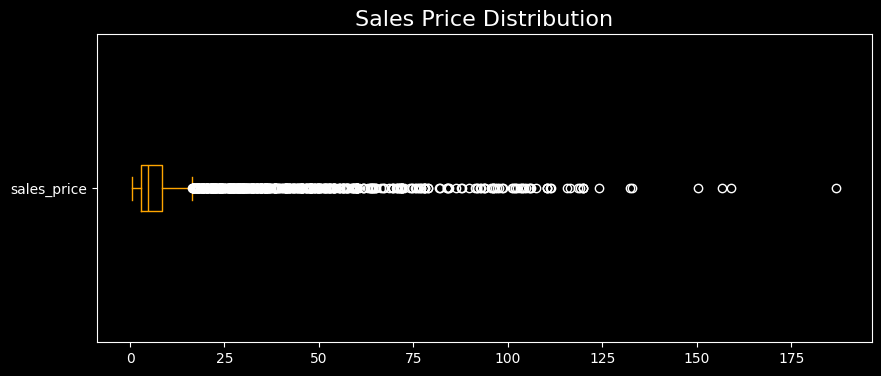

In [44]:
#Plotting the distribution of the sales price using a boxplot
plt.style.use('dark_background')
df_elec.boxplot(column='sales_price',vert=False, figsize=(10, 4), color='orange', grid=False)
plt.title('Sales Price Distribution', fontsize=16)

### Detecting outliers using Z-score Statistical Method

In [45]:
#Calculating the Z-score of each value in the sales price column
df_elec['z-score'] = stats.zscore(df_elec['sales_price'])

In [46]:
#the number of outliers beyond the z-score threshold
df_elec.loc[(df_elec['z-score'] < -3) | (df_elec['z-score'] > 3)].shape

(138, 13)

In [47]:
#Removing some of the values considered as ouliers
df_elec.drop(df_elec.loc[(df_elec['z-score'] < -3) | (df_elec['z-score'] > 3)].index, inplace=True)

#### Plotting the Distributions and Relationships of the Sales Price and the Weight

Text(0.5, 0, 'Sales price')

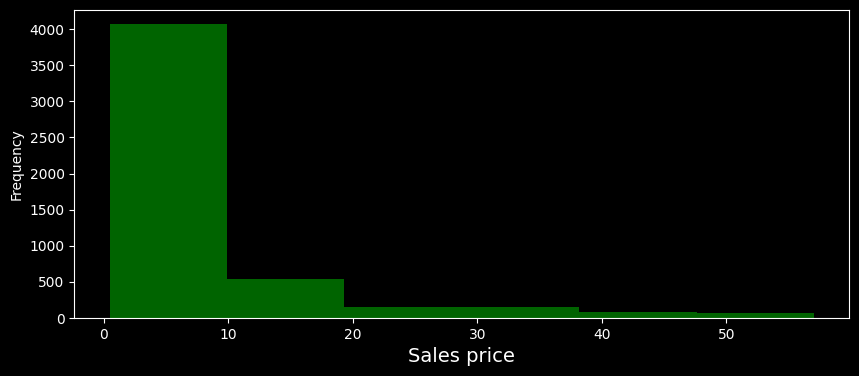

In [48]:
plt.style.use('dark_background')
df_elec['sales_price'].plot.hist(bins=6, figsize=(10,4), color='darkgreen')
plt.xlabel('Sales price', fontsize=14)

Text(0.5, 1.0, 'Sales Price Distribution')

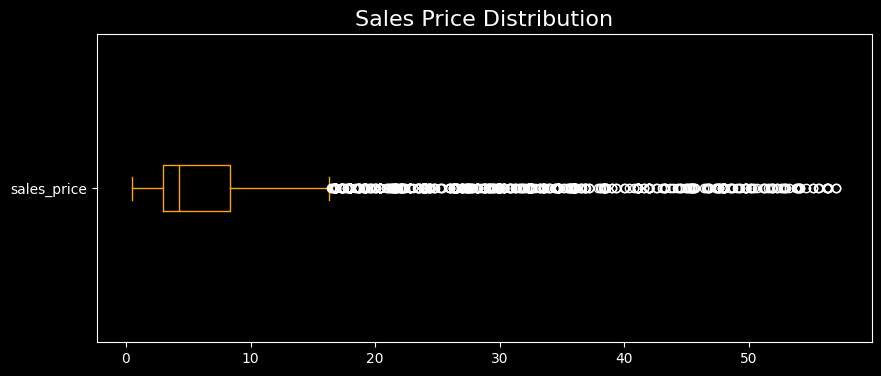

In [49]:
plt.style.use('dark_background')
df_elec.boxplot(column='sales_price',vert=False, figsize=(10, 4), color='orange', grid=False)
plt.title('Sales Price Distribution', fontsize=16)

<Axes: xlabel='weight_grams', ylabel='sales_price'>

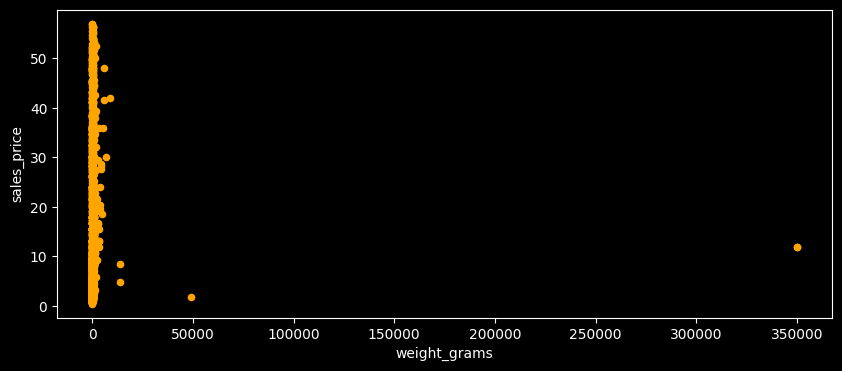

In [50]:
#Plotting the relationship between weight and price
plt.style.use('dark_background')
df_elec.plot.scatter(x='weight_grams', y='sales_price', figsize=(10, 4),c='orange')

<Axes: >

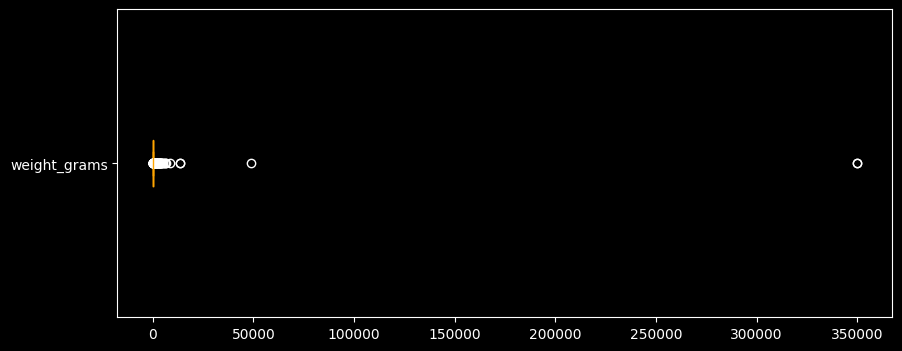

In [51]:
plt.style.use('dark_background')
df_elec.boxplot(column='weight_grams',vert=False, figsize=(10, 4), color='orange', grid=False)

**From the scatter plot of weight and price and the boxplot of the weight we can clearly see that there are 2 extreme values \
that need to be removed so they won't impact the analysis**

<Axes: >

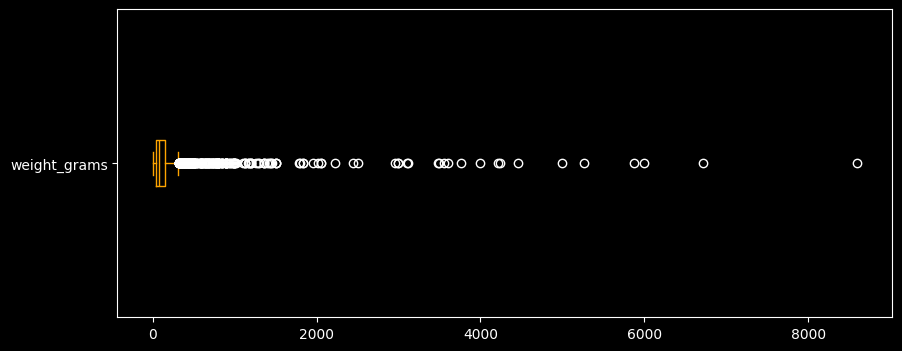

In [52]:
#boxplot of the weight after removing the most extreme values
df_elec = df_elec[df_elec['weight_grams'] < 12000]
df_elec.boxplot(column='weight_grams',vert=False, figsize=(10, 4), color='orange', grid=False)

**We don't need to remove all the outliers as the heavier and more expensive products can be analyzed separately and they can still produce meaningful insights. We only needed to remove the extreme values that will affect the overall analysis.**

In [53]:
#final number of values after the data cleaning
df_elec.shape

(5033, 13)

In [55]:
#fixing the indexing 
df_elec.reset_index(drop=True, inplace=True)

In [56]:
df_elec.head()

,asin,product_name,seller_name,brand,sales_price,discount_percentage,weight_grams,rating,delivery_type,meta_keywords,amazon_prime__y_or_n,rank,z-score
0,B07652FT69,Cazcase Deer Pattern Smart Case Cover Flip Sta...,E Shop Solution,CAZCASE,8.39,46,308.0,3.8,fulfilled_by_amazon,Cazcase Deer Pattern Smart Case Cover Flip Sta...,Y,35464,-0.083474
1,B079VL519L,Heartly Kickstand Hard Dual Rugged Armor Hybri...,Ruh International,Heartly,3.59,77,49.9,4.6,fulfilled_by_amazon,Heartly Kickstand Hard Dual Rugged Armor Hybri...,Y,698934,-0.387184
2,B00JYKGFWY,"iPhone 6 Case, LUVVITT® ULTRA ARMOR iPhone 6 C...",HelloYehlo,Luvvitt,47.45,34,68.0,4.6,fulfilled_by_merchant,"iPhone 6 Case, LUVVITT® ULTRA ARMOR iPhone 6 C...",N,3181968,2.387965
3,B00LPC3O3M,"Verbatim Bravo Wired Notebook Optical Mouse, B...",G. G.,Verbatim,15.50,52,90.7,4.2,fulfilled_by_merchant,"Verbatim Bravo Wired Notebook Optical Mouse, B...",N,156041,0.366396
4,B07BV5K9TV,Aarfa Slimfit Durable Printed Hard Case for Xi...,arretail,Aarfa,3.58,70,49.9,3.9,fulfilled_by_merchant,Aarfa Slimfit Durable Printed Hard Case for Xi...,Y,373349,-0.387817


In [57]:
#adding the df to a csv file without the index values
df_elec.to_csv('amazon_data_cleaned.csv', index=False)